# 1. Fetch data

In [ ]:
import pandas as pd

In [ ]:
covid = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
covid.head(3)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9145,9207,9246,9287,9317,9351,9371,9416,9439,9493,9511,9527,9546,9568,9611,9642,9652,9667,9691,9703,9715,9744,9761,9777,9780,9790,9799,9810,9826,9839,9843,9850,9851,9858,9865,9874,9883,9893,9901,9904
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,34536,34726,34872,34950,35039,35221,35347,35517,35619,35707,35750,35814,35886,35946,36054,36108,36201,36242,36278,36352,36409,36447,36491,36542,36579,36602,36697,36734,36780,36814,36870,36889,36905,36933,36965,37018,37044,37069,37087,37098
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3243,3260,3282,3295,3315,3329,3346,3355,3370,3389,3398,3403,3416,3419,3429,3432,3465,3472,3474,3481,3483,3490,3495,3512,3519,3521,3524,3527,3536,3541,3545,3546,3546,3548,3550,3552,3553,3554,3556,3560


# 2. Prepare data

1. Look for outliers e.g., notice any repeated names
2. Combine repeated entries via grouping and adding 
3. Ensure each column is represented by a country or state

This line is actually adding the number of reported cases by state.

## Hello

In [ ]:
covid = covid.groupby(["Province_State"]).agg('sum')
covid = covid.drop(columns=["UID", "code3", "FIPS", "Lat", "Long_"])
covid.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,722122,724688,727360,732151,736518,741318,745812,747606,750298,754242,757893,761865,764839,768301,770391,772311,775531,778549,781915,784484,787421,789054,790648,792632,794773,796475,798320,799800,800692,801428,802977,804249,805511,806560,807479,808132,808599,809485,810501,811551
Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,90642,90642,92790,93632,94474,95175,95175,95175,96635,97326,98419,99472,100360,100360,100360,102471,103327,104574,105893,107679,107679,107679,111692,112391,113392,114665,115703,115703,115703,117941,118793,119659,120514,121348,121348,121348,124123,124579,125803,126783
American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3
Arizona,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1030430,1032808,1034790,1037012,1039492,1042480,1045835,1048600,1050878,1053487,1055919,1058774,1061604,1064346,1066803,1068823,1070757,1072863,1075876,1078874,1081790,1084369,1086328,1087451,1090839,1093583,1097225,1100167,1102422,1104535,1106789,1108830,1111359,1114061,1116419,1118601,1120361,1122390,1124709,1127095
Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,463795,464732,465315,467496,469977,472136,473885,475001,475647,477191,479110,480934,482743,484317,485056,485452,486853,488316,489856,491221,492233,492650,493120,493920,495073,496077,496934,497576,498062,498257,499004,499886,500779,501518,502405,502806,503089,503822,504516,505297


In [ ]:
covid = covid.groupby(["Province_State"]).sum()
covid.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21,9/18/21,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,722122,724688,727360,732151,736518,741318,745812,747606,750298,754242,757893,761865,764839,768301,770391,772311,775531,778549,781915,784484,787421,789054,790648,792632,794773,796475,798320,799800,800692,801428,802977,804249,805511,806560,807479,808132,808599,809485,810501,811551
Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,90642,90642,92790,93632,94474,95175,95175,95175,96635,97326,98419,99472,100360,100360,100360,102471,103327,104574,105893,107679,107679,107679,111692,112391,113392,114665,115703,115703,115703,117941,118793,119659,120514,121348,121348,121348,124123,124579,125803,126783
American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3
Arizona,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1030430,1032808,1034790,1037012,1039492,1042480,1045835,1048600,1050878,1053487,1055919,1058774,1061604,1064346,1066803,1068823,1070757,1072863,1075876,1078874,1081790,1084369,1086328,1087451,1090839,1093583,1097225,1100167,1102422,1104535,1106789,1108830,1111359,1114061,1116419,1118601,1120361,1122390,1124709,1127095
Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,463795,464732,465315,467496,469977,472136,473885,475001,475647,477191,479110,480934,482743,484317,485056,485452,486853,488316,489856,491221,492233,492650,493120,493920,495073,496077,496934,497576,498062,498257,499004,499886,500779,501518,502405,502806,503089,503822,504516,505297


In [ ]:
covid = covid.T
covid.head()

Province_State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,District of Columbia,Florida,Georgia,Grand Princess,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Northern Mariana Islands,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1/26/20,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


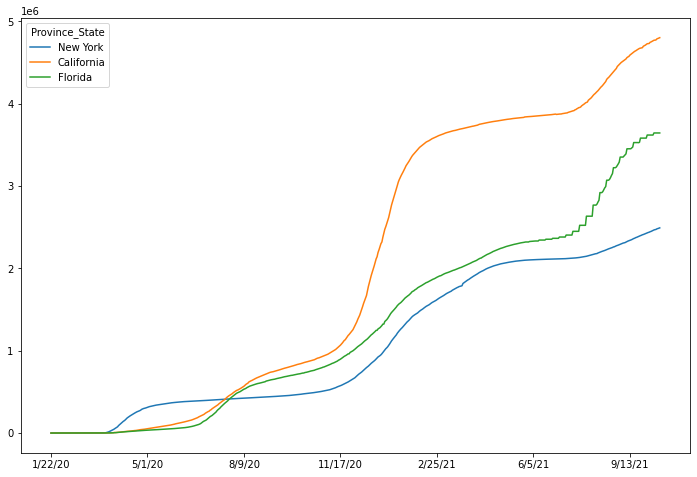

In [ ]:
states = ["New York", "California", "Florida"]
covid[states].plot(figsize = (12, 8))

# 3. Detect delta in reported cases

 1, 2 , 3 => 

 1 -> 2 => 1
 2 -> 3 => 1

 3 - 2 => -1
 2 - 1 => -1
 CT = sum(-2)
 CA = sum(-3)
 Alaks = + 3

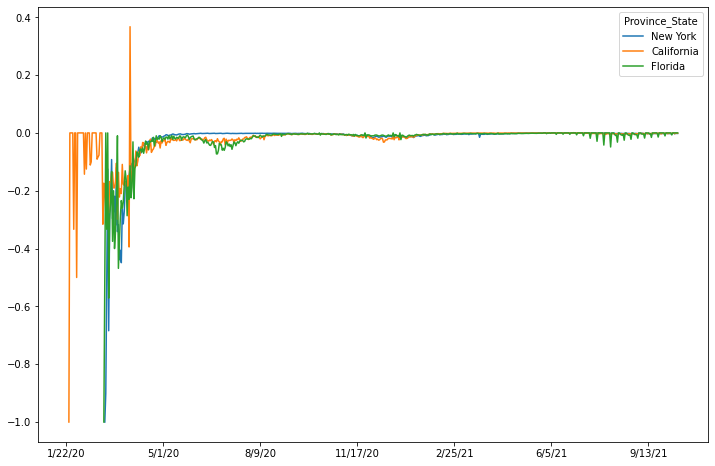

In [ ]:
# Verify whether percentage change function works
covid[states].pct_change(periods=-1).plot(figsize = (12, 8))


In [ ]:
covid_pct_change = covid.pct_change()
covid_pct_change.tail()

Province_State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,District of Columbia,Florida,Georgia,Grand Princess,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Northern Mariana Islands,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
10/10/21,0.000809,0.000000,0.0,0.001954,0.000798,0.000243,0.000000,0.000000,0.002265,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.002682,0.000767,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000074,0.002455,0.000000,0.000000,0.000000,0.000000,0.000922,0.000000,0.000000,0.000000,0.000000,0.001225,0.000000,0.000893,0.000000,0.001983,0.000000,0.003693,0.000000,0.000000,0.002440,0.001433,0.000000,0.000000,0.000000,0.000000,0.000123,0.000000,0.006007,0.000000,0.000000,0.000000,0.004249,0.000000,0.000000
10/11/21,0.000578,0.022868,0.0,0.001573,0.000563,0.002763,0.008547,0.000000,0.002609,0.0,0.000000,0.0,0.000000,0.0,0.013576,0.001386,0.000000,0.000000,0.004804,0.000000,0.004190,0.006391,0.001959,0.000000,0.001487,0.000000,0.008259,0.004346,0.002106,0.000879,0.000000,0.000000,0.003837,0.005128,0.000814,0.000000,0.002962,0.006659,0.001667,0.029304,0.002001,0.007898,0.008443,0.001755,0.000131,0.000000,0.005720,0.000000,0.003626,0.001409,0.000000,0.006167,0.000000,0.000000,0.009642,0.002990,0.006889,0.008844
10/12/21,0.001096,0.003674,0.0,0.001811,0.001457,0.001064,0.002880,0.003739,0.001196,0.0,0.000000,0.0,0.004376,0.0,0.011366,0.000600,0.007225,0.004765,0.001622,0.000000,0.000112,0.003275,0.001508,-0.000011,0.000754,0.005398,0.000000,0.010726,0.001656,0.001188,0.013965,0.006872,0.002082,0.011086,0.001400,0.009373,0.001323,0.001497,0.005218,0.000000,0.003031,0.000948,0.003927,0.003456,0.000808,0.005253,0.001107,0.002902,0.002105,0.001235,0.008393,0.003706,0.002158,0.008399,0.002754,0.002966,0.003915,0.005077
10/13/21,0.001255,0.009825,0.0,0.002066,0.001377,0.000896,0.003534,0.000607,0.002324,0.0,0.000766,0.0,0.001249,0.0,0.008140,0.001555,0.007480,0.001757,0.002726,0.017702,0.004848,0.003299,0.000735,0.009406,0.002041,0.002347,0.009072,0.003182,0.001449,0.001606,0.008353,0.003065,0.001448,0.004310,0.001487,0.002709,0.001836,0.002254,0.004759,0.003559,0.003830,0.001939,0.003289,0.003373,0.000409,0.001653,0.001135,0.007339,0.001935,0.005386,0.003517,0.009077,0.001866,0.002634,0.004468,0.004437,0.003440,0.004591
10/14/21,0.001295,0.007790,0.0,0.002121,0.001548,0.001196,0.004549,0.002295,0.003568,0.0,0.001625,0.0,0.001304,0.0,0.005725,0.002005,0.007098,0.001494,0.002642,0.000000,0.000052,0.003174,0.001122,0.008421,0.002055,0.002156,0.000000,0.003892,0.001063,0.001749,0.007933,0.002695,0.001432,0.005111,0.001393,0.003343,0.001810,0.002612,0.004464,0.000000,0.003474,0.001876,-0.003279,0.003523,0.001244,0.001781,0.001670,0.002283,0.001626,0.001379,0.002380,0.004154,0.006019,0.002899,0.004138,0.004942,0.003443,0.006298


## Changes in 60 days

In [ ]:
result = covid_pct_change.tail(60).sum()
result = result.fillna(0) # fill all non-zero values e.g. NaN with zeros
result.head()

Province_State
Alabama           0.246227
Alaska            0.465955
American Samoa         inf
Arizona           0.155019
Arkansas          0.185745
dtype: float64

In [ ]:
# result is a pandas series object, we will convert to dataframe due to our familiarity 
result = result.reset_index()
result.head()

,Province_State,0
0,Alabama,0.246227
1,Alaska,0.465955
2,American Samoa,inf
3,Arizona,0.155019
4,Arkansas,0.185745


In [ ]:
result = result.sort_values(by=0) # sort the result by column "0"
result = result[result[0] != 0.0] # remove all columns where delta is zero (possibly data is inaccurate)
result.head(10)

,Province_State,0
7,Connecticut,0.091935
34,New Jersey,0.104386
45,Rhode Island,0.111270
36,New York,0.122266
25,Massachusetts,0.124482
5,California,0.131257
24,Maryland,0.132147
17,Illinois,0.132248
32,Nevada,0.147961
44,Puerto Rico,0.148115


## Visualize results

### Top-10 better states

In [ ]:
import plotly.express as px
px.bar(result.head(10), y=0, x="Province_State", color="Province_State")

### Top-10 worst states

In [ ]:
px.bar(result.tail(10), y=0, x="Province_State", color="Province_State")